In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

### 1. 이름순으로 정렬하시요

In [4]:
sr.sort_index(ascending=True)

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

### 2. 키보드로 입력받아 검색된 이름의 점수를 구하시요

In [13]:
name = input('이름을 입력하시오: ')
sr[sr.index==name]

이이    76
Name: 국어점수, dtype: int64

### 3.데이터를 다음과 같이 출력하시요


In [ ]:
# (0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
# ---------------------
#     이름    국어   학점
# ---------------------
#     홍길동  70	    C
#     ...
#     김철수3 25      F

In [104]:
sr_cut = pd.cut(sr, [0,59,69,79,89,100], labels=['F','D','C','B','A'])
print('-'*30)
print('이름','국어','학점',sep='\t')
print('-'*30)
for i,v,cut_v in zip(sr.index, sr.values, sr_cut.values):
    print(i,v,cut_v,sep='\t')

------------------------------
이름	국어	학점
------------------------------
홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F


### 4. 국어 점수 50점이하는 가산점20를 부여하고 국어 점수 50점초과는 가산점10를 부여하시요


In [26]:
sr.apply(lambda v: v*1.2 if v<=50 else v*1.1)

홍길동     99.0
이순신     99.0
임꺽정     60.5
정난정     66.0
이이      83.6
이황      88.0
정도전     83.6
김철수1    96.8
김철수2    36.0
김철수3    30.0
Name: 국어점수, dtype: float64

### 5. 국어점수 10%, 50%, 90%에 해당하는 값을 구하시요

In [28]:
sr.quantile([0.1,0.5,0.9])

0.1    29.5
0.5    76.0
0.9    90.0
Name: 국어점수, dtype: float64

### 6. 각 국어점수에 대한 갯수 를 구하시요.

In [29]:
sr.value_counts()

90    2
76    2
30    1
60    1
25    1
88    1
55    1
80    1
Name: 국어점수, dtype: int64

### 7. 국어점수에 대한 boxplot을 그리시요.

<AxesSubplot:>

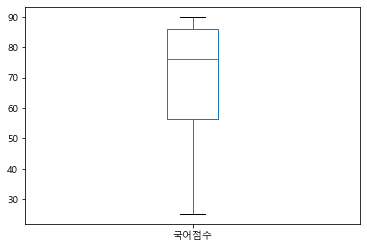

In [30]:
sr.plot(kind='box')

### 8. 국어 점수를 10개(0~100점을) 로 분할한 경우 각 점수별  도수분포표를 구하고(아래이미지참조) 히스토그램을 구하시요


In [100]:
sr_cut1=pd.cut(sr,10).values


In [101]:
sr_cut_do=pd.cut(sr,10).value_counts().sort_index(ascending=False).values

sr_cut_do

array([3, 1, 2, 0, 1, 1, 0, 0, 0, 2], dtype=int64)

In [102]:
# n : 계급, d : 도수, k : 누적도수 
m=0
print('계급     ','도수','누적도수',sep='\t')
for n,d in zip(sr_cut1,sr_cut_do):
    m=m+d
    print(n,d,m, sep='\t')


계급     	도수	누적도수
(83.5, 90.0]	3	3
(83.5, 90.0]	1	4
(51.0, 57.5]	2	6
(57.5, 64.0]	0	6
(70.5, 77.0]	1	7
(77.0, 83.5]	1	8
(70.5, 77.0]	0	8
(83.5, 90.0]	0	8
(24.935, 31.5]	0	8
(24.935, 31.5]	2	10


### 9. 과일의 비율을 파이차트로 그리시요

In [39]:
fruit=pd.Series([10,20,30,50], index=['사과','딸기','포도','수박'] )
fruit

사과    10
딸기    20
포도    30
수박    50
dtype: int64

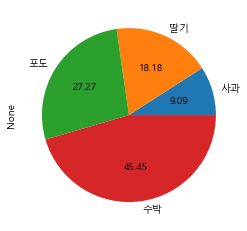

In [40]:
fruit.plot(kind='pie', autopct='%.2f')
plt.show()